<a href="https://colab.research.google.com/github/shreeshaa/BDA-homework-1/blob/master/websearch10konly0.5first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install tweet-preprocessor
import pandas as pd
import numpy as np
import scipy as sp
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from copy import deepcopy
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer 

import preprocessor as p

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv("/content/drive/My Drive/WebProject/labeledTrainData.csv", delimiter="\t",names=["tweet", "label", "labelValue"])

In [0]:
data["label"].replace({"spam": "neutral", "normal": "neutral"}, inplace=True)
data["label"].replace({"neutral":1, "abusive": 2,"hateful":3}, inplace=True)

In [0]:
def preprocess_tweet(tweet):

    # 1. Remove URLs, emojis, mentions, smileys using tweet-preprocessor library
    # should not remove hashtags as hashtags contains important tweet content.
    
    #p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION,p.OPT.RESERVED,	p.OPT.SMILEY,p.OPT.NUMBER)
    clean = p.clean(tweet)
    # 2. Remove HTML tags using Beautiful soup library
    no_tag = BeautifulSoup(clean).get_text()

    # 3. Expanding hashtags.
    
    #tweets_expanded = expand_hashtags(no_tag)

    # 4. Remove non letter char using re
    letters_only = re.sub("[^a-zA-Z]"," ", no_tag)
    #letters_only = re.sub("[^a-zA-Z]"," ", tweets_expanded)
    
    # 5. Convert to lower case
    lower_case = letters_only.lower()
    words = lower_case.split()

    new_words = []
    # ps = PorterStemmer() 
    # for w in words:
    #     new_words.append(ps.stem(w))
    for w in words:
        new_words.append(w)
    # print(new_words[0:4])
    # 5. Remove stop words
    # stops = set(stopwords.words("english")) 
    # final_words = [w for w in new_words if not w in stops]
    final_words = new_words

    return(" ".join( final_words ))

In [42]:
data["tweet"][0]

'Beats by Dr. Dre urBeats Wired In-Ear Headphones - White https://t.co/9tREpqfyW4 https://t.co/FCaWyWRbpE'

In [43]:
num_tweets = data["tweet"].size
# print(num_tweets)
for i in range(num_tweets):
    data["tweet"][i] = preprocess_tweet(data["tweet"][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
data

,tweet,label,labelValue
0,beats by dr dre urbeats wired in ear headphone...,1,4
1,man it would fucking rule if we had a party th...,2,4
2,it is time to draw close to him father i draw ...,1,4
3,if you notice me start to act different or dis...,1,5
4,forget unfollowers i believe in growing new fo...,1,3
...,...,...,...
99991,my fucking queen,2,5
99992,treated with rebuild bone mass,1,3
99993,why does my phone screen keeps flickring i m s...,1,3
99994,vs but equally applies to any project,1,5


In [45]:
hateful = data["label"]==3
hateful = data[hateful]
# hateful = hateful.sample(frac=1)
# hateful = hateful.reset_index(drop=True)
# hateful = hateful[:4333]
hateful['hateful'] = 1
hateful['abusive'] = 0
hateful['neutral'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [46]:
hateful

,tweet,label,labelValue,hateful,abusive,neutral
21,bad day for suspect in st petersburg metro bom...,3,2,1,0,0
34,i m over the fucking moon we ve cleared up the...,3,3,1,0,0
37,nah bitch i hate u,3,3,1,0,0
71,i fucking hate people,3,3,1,0,0
106,you looked like a complete pathetic idiot toni...,3,3,1,0,0
...,...,...,...,...,...,...
99885,i hate you i ll beat rice gums ass any day of ...,3,3,1,0,0
99905,asking if i m mad pisses me off why you puttin...,3,5,1,0,0
99925,i m not cheering for him just that he fucked up,3,2,1,0,0
99950,ain t nothin but a medicnal baby two locked ou...,3,3,1,0,0


In [47]:
abusive = data["label"]==2
abusive = data[abusive]
# abusive = abusive.sample(frac=1)
# abusive = abusive.reset_index(drop=True)
# abusive = abusive[:4333]
abusive['hateful'] = 0
abusive['abusive'] = 1
abusive['neutral'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [48]:
abusive

,tweet,label,labelValue,hateful,abusive,neutral
1,man it would fucking rule if we had a party th...,2,4,0,1,0
5,hate being sexually frustrated like i wanna fu...,2,4,0,1,0
9,if your fucking up your homies dont tell you t...,2,4,0,1,0
12,that s one way he pulls you in rt norman fucki...,2,4,0,1,0
13,spotify is fucking with me,2,4,0,1,0
...,...,...,...,...,...,...
99982,coquelin is fucking garbage,2,4,0,1,0
99984,who all fucking with,2,5,0,1,0
99986,every fucking time,2,4,0,1,0
99988,if u say baseball is boring than your an ignor...,2,3,0,1,0


In [49]:
neutral = data["label"]==1
neutral = data[neutral]
# neutral = neutral.sample(frac=1)
# neutral = neutral.reset_index(drop=True)
# neutral = neutral[:4334]
neutral['hateful'] = 0
neutral['abusive'] = 0
neutral['neutral'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [0]:
union = pd.concat([hateful, abusive,neutral])

In [0]:
union = union.sample(frac=1, random_state=1).reset_index(drop=True)

In [52]:
union.shape

(99996, 6)

In [53]:
union

,tweet,label,labelValue,hateful,abusive,neutral
0,obama s nobel peace prize was the death knell ...,1,4,0,0,1
1,prove with credible evidence the beginner is a...,1,3,0,0,1
2,my fucking god don t die backflips like a crui...,2,2,0,1,0
3,national take a walk in the park day is upon u...,1,4,0,0,1
4,limited edition collectors versions and hard b...,1,3,0,0,1
...,...,...,...,...,...,...
99991,walked in the house like happy friday educator...,1,5,0,0,1
99992,a quick and easy way to stabilize your mood sw...,1,5,0,0,1
99993,y all really miserable if you feel the need to...,2,4,0,1,0
99994,iggy azalea has revealed the ultimate way to l...,1,3,0,0,1


In [0]:
train = union[:69996]
validation = union[69996:79996]
test = union[79996:99996]

In [19]:
train[train["label"] == 3]

,tweet,label,labelValue,hateful,abusive,neutral
17,morning gm i love my customers just like i lov...,3,1,1,0,0
19,i aplaud this initiative it s to give more equ...,3,3,1,0,0
39,all he needs is to loose the customary british...,3,4,1,0,0
68,did u cum nigga did u see me fucking cum,3,3,1,0,0
105,blacks africans people on a plate they bad neg...,3,5,1,0,0
...,...,...,...,...,...,...
69912,virtually all democrats voted for paid sick le...,3,3,1,0,0
69915,i hate when someone pass away and then everybo...,3,3,1,0,0
69930,i smell a bribe or a threat e p a chief reject...,3,2,1,0,0
69941,i m goin to find u then i m goin to fuck u thi...,3,4,1,0,0


In [0]:
%matplotlib inline

In [56]:
!pip install transformers

import logging
import time
from platform import python_version

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable

In [0]:
model_class = transformers.BertModel
tokenizer_class = transformers.BertTokenizer
pretrained_weights='bert-base-uncased'
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [0]:
max_seq = 100
target_columns = ["hateful", "abusive", "neutral"]

In [0]:
def tokenize_text(df, max_seq):
    return [
        tokenizer.encode(text, add_special_tokens=True)[:max_seq] for text in df.tweet.values
    ]


def pad_text(tokenized_text, max_seq):
    return np.array([el + [0] * (max_seq - len(el)) for el in tokenized_text])


def tokenize_and_pad_text(df, max_seq):
    tokenized_text = tokenize_text(df, max_seq)
    padded_text = pad_text(tokenized_text, max_seq)
    return torch.tensor(padded_text)


def targets_to_tensor(df):
    return torch.tensor(df[target_columns].values, dtype=torch.float32)

In [0]:
train_indices = tokenize_and_pad_text(train, max_seq)
val_indices = tokenize_and_pad_text(validation, max_seq)
test_indices = tokenize_and_pad_text(test, max_seq)

In [63]:
train_indices.shape

torch.Size([69996, 100])

In [0]:
with torch.no_grad():
  for i in range(10):
    if i == 0:
      x_train = bert_model(train_indices[:1000])[0]
      x_val = bert_model(val_indices[:1000])[0]
      x_test = bert_model(test_indices[:1000])[0]
    else:
      x_train = torch.cat((x_train,bert_model(train_indices[i*1000:(i+1)*1000])[0]),dim=0)
      x_val = torch.cat((x_val,bert_model(val_indices[i*1000:(i+1)*1000])[0]),dim=0)
      x_test = torch.cat((x_test,bert_model(test_indices[i*1000:(i+1)*1000])[0]),dim=0)

In [0]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [0]:
y_train = targets_to_tensor(train)
y_val = targets_to_tensor(validation)
y_test = targets_to_tensor(test)

In [0]:
y_test.shape

torch.Size([2000, 3])

In [0]:
A = torch.tensor(np.ones((10,10)))
B = torch.tensor(np.zeros((10,10)))
A= torch.stack((A, B),dim=0)
A.shape

torch.Size([2, 10, 10])

In [0]:
torch.save(x_train, 'x_train.pt')
torch.save(x_val, 'x_val.pt')
torch.save(x_test, 'x_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_val, 'y_val.pt')
torch.save(y_test, 'y_test.pt')

In [0]:
x_train[0]

tensor([[-0.3871,  0.3375,  0.4415,  ..., -0.2705,  0.4182, -0.9232],
        [ 0.9841,  0.2199,  0.3651,  ..., -0.1147,  1.0296, -0.8402],
        [-0.2191, -0.2154,  0.6487,  ..., -0.0225, -0.0383, -0.2382],
        ...,
        [ 0.3948, -0.2816,  0.9764,  ..., -0.5996,  0.2323, -0.9041],
        [ 0.2859, -0.3054,  0.9435,  ..., -0.5704,  0.1383, -0.8545],
        [ 0.3253, -0.1105,  0.8474,  ..., -0.5625,  0.1061, -0.9950]])

In [0]:
class KimCNN(nn.Module):
    def __init__(self, embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static):
        super(KimCNN, self).__init__()

        V = embed_num
        D = embed_dim
        C = class_num
        Co = kernel_num
        Ks = kernel_sizes
        
        self.static = static
        self.embed = nn.Embedding(V, D)
        self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, D)) for K in Ks])
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(len(Ks) * Co, C)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        if self.static:
            x = Variable(x)

        x = x.unsqueeze(1)  # (N, Ci, W, D)

        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)

        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)

        x = torch.cat(x, 1)
        x = self.dropout(x)  # (N, len(Ks)*Co)
        logit = self.fc1(x)  # (N, C)
        output = self.sigmoid(logit)
        return output

In [0]:
embed_num = x_train.shape[1]
embed_dim = x_train.shape[2]
class_num = y_train.shape[1]
kernel_num = 3
kernel_sizes = [2, 3, 4]
dropout = 0.5
static = True

In [0]:
model = KimCNN(
    embed_num=embed_num,
    embed_dim=embed_dim,
    class_num=class_num,
    kernel_num=kernel_num,
    kernel_sizes=kernel_sizes,
    dropout=dropout,
    static=static,
)

In [0]:
n_epochs = 10
batch_size = 10
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

In [0]:
def generate_batch_data(x, y, batch_size):
    i, batch = 0, 0
    for batch, i in enumerate(range(0, len(x) - batch_size, batch_size), 1):
        x_batch = x[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield x_batch, y_batch, batch
    if i + batch_size < len(x):
        yield x[i + batch_size :], y[i + batch_size :], batch + 1
    if batch == 0:
        yield x, y, 1

In [0]:
train_losses, val_losses = [], []

for epoch in range(n_epochs):
    start_time = time.time()
    train_loss = 0

    model.train(True)
    for x_batch, y_batch, batch in generate_batch_data(x_train, y_train, batch_size):
        y_pred = model(x_batch)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= batch
    train_losses.append(train_loss)
    elapsed = time.time() - start_time

    model.eval() # disable dropout for deterministic output
    with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
        val_loss, batch = 0, 1
        for x_batch, y_batch, batch in generate_batch_data(x_val, y_val, batch_size):
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            val_loss += loss.item()
        val_loss /= batch
        val_losses.append(val_loss)

    print(
        "Epoch %d Train loss: %.2f. Validation loss: %.2f. Elapsed time: %.2fs."
        % (epoch + 1, train_losses[-1], val_losses[-1], elapsed)
    )

Epoch 1 Train loss: 0.54. Validation loss: 0.42. Elapsed time: 49.22s.
Epoch 2 Train loss: 0.48. Validation loss: 0.40. Elapsed time: 48.55s.
Epoch 3 Train loss: 0.45. Validation loss: 0.39. Elapsed time: 48.57s.
Epoch 4 Train loss: 0.44. Validation loss: 0.39. Elapsed time: 48.65s.
Epoch 5 Train loss: 0.43. Validation loss: 0.38. Elapsed time: 48.58s.
Epoch 6 Train loss: 0.42. Validation loss: 0.39. Elapsed time: 48.42s.
Epoch 7 Train loss: 0.42. Validation loss: 0.40. Elapsed time: 50.66s.
Epoch 8 Train loss: 0.42. Validation loss: 0.40. Elapsed time: 48.63s.
Epoch 9 Train loss: 0.41. Validation loss: 0.39. Elapsed time: 48.44s.
Epoch 10 Train loss: 0.40. Validation loss: 0.39. Elapsed time: 48.36s.


Text(0.5, 1.0, 'Losses')

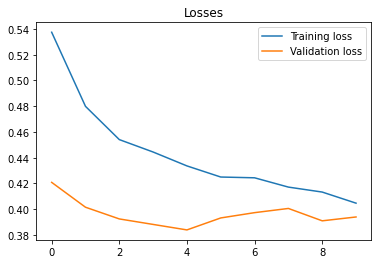

In [0]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title("Losses")

In [0]:
model.eval() # disable dropout for deterministic output
with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
    y_preds = []
    batch = 0
    for x_batch, y_batch, batch in generate_batch_data(x_test, y_test, batch_size):
        y_pred = model(x_batch)
        print(y_pred)
        y_preds.extend(y_pred.cpu().numpy().tolist())
    y_preds_np = np.array(y_preds)

tensor([[7.1651e-01, 1.9101e-01, 3.7839e-02],
        [3.4686e-01, 5.6833e-01, 2.2498e-02],
        [8.4366e-02, 2.5483e-02, 8.9734e-01],
        [7.8249e-01, 1.1565e-01, 6.4268e-02],
        [2.2573e-01, 2.4288e-01, 4.8196e-01],
        [1.8316e-01, 7.4977e-01, 3.9608e-02],
        [2.9275e-02, 2.4041e-03, 9.8386e-01],
        [1.6547e-01, 7.8616e-01, 2.8436e-02],
        [8.4606e-03, 1.0645e-04, 9.9921e-01],
        [1.6682e-01, 7.8341e-01, 2.9199e-02]])
tensor([[7.0323e-01, 1.8903e-01, 4.9686e-02],
        [1.1361e-02, 4.5060e-05, 9.9926e-01],
        [1.9258e-01, 7.3004e-01, 4.6694e-02],
        [7.5471e-02, 1.5768e-02, 9.3353e-01],
        [2.7446e-01, 2.8335e-01, 3.9005e-01],
        [1.8288e-01, 6.3908e-01, 7.2097e-02],
        [6.1008e-01, 2.2936e-01, 1.0294e-01],
        [1.0687e-01, 2.0433e-01, 1.7352e-01],
        [2.4456e-01, 6.4208e-01, 6.5061e-02],
        [1.7376e-02, 5.2118e-04, 9.9665e-01]])
tensor([[0.0389, 0.0064, 0.9649],
        [0.1463, 0.0882, 0.7184],
        [0

In [0]:
y_preds_np

array([[0.71650904, 0.19101149, 0.03783878],
       [0.34686202, 0.56832588, 0.02249819],
       [0.08436563, 0.02548326, 0.89733642],
       ...,
       [0.70308298, 0.14448775, 0.09865732],
       [0.14761101, 0.82154721, 0.01967647],
       [0.28962249, 0.41101182, 0.15875347]])

In [0]:
y_test_np = test[target_columns].values

In [0]:
y_test_np[1000:]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [0]:
auc_scores = roc_auc_score(y_test_np, y_preds_np, average=None)
df_accuracy = pd.DataFrame({"label": target_columns, "auc": auc_scores})
df_accuracy.sort_values('auc')[::-1]

,label,auc
2,neutral,0.936644
1,abusive,0.902222
0,hateful,0.849197
